In [2]:
%matplotlib inline
import os
os.chdir("../")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import json
from src import utils
from IPython.display import clear_output


/NL/token-pricing/work/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Plot figures for section 2

/tmp/ipykernel_3158574/3749100224.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_df, x="x",y="y", palette=palette, ax=ax)
/tmp/ipykernel_3158574/3749100224.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=raw_df, x="x",y="y", palette=palette, ax=ax)


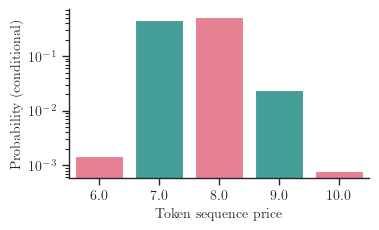

In [22]:

sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 2)
utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX
raw_df = pd.DataFrame({"x": np.load("/NL/token-pricing/work/outputs/lengths_overwhelmed and speechless.npy"), "y": np.load("/NL/token-pricing/work/outputs/probs_overwhelmed and speechless.npy")})


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# draw axis
sns.barplot(data=raw_df, x="x",y="y", palette=palette, ax=ax)            
sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Token sequence price")
ax.set_ylabel("Probability (conditional)")
#ax.legend(title="p", loc='upper left')

fig.tight_layout()
plt.show()
#fig.savefig('figures/hist.pdf', dpi=300)

lengths shape:  (902,)
probs shape:  (902,)


/tmp/ipykernel_3158574/2694027729.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_df, x="lengths",y="probs", palette=palette, ax=ax  , fliersize=0, fill=False)
/tmp/ipykernel_3158574/2694027729.py:54: UserWarning: 
The palette list has fewer values (2) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=raw_df, x="lengths",y="probs", palette=palette, ax=ax  , fliersize=0, fill=False)


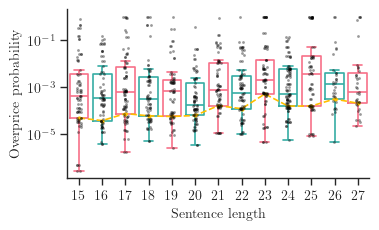

In [42]:

sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 2)
utils.latexify() # Computer Modern, with TeX


len_1 = np.load("./outputs/sentences_lengths_baseline_short.npy")
len_2 = np.load("./outputs/sentences_lengths_baseline_short_2.npy")
len_3 = np.load("./outputs/sentences_lengths_baseline_short_3.npy")
len_4 = np.load("./outputs/sentences_lengths_baseline_short_4.npy")
len_5 = np.load("./outputs/sentences_lengths_baseline_short_5.npy")
len_6 = np.load("./outputs/sentences_lengths_baseline_short_6.npy")
len_7 = np.load("./outputs/sentences_lengths_baseline_short_7.npy")
len_8 = np.load("./outputs/sentences_lengths_baseline_short_8.npy") 

prob_1 = np.load("./outputs/probability_overcost_baseline_short.npy")
prob_2 = np.load("./outputs/probability_overcost_baseline_short_2.npy")
prob_3 = np.load("./outputs/probability_overcost_baseline_short_3.npy")
prob_4 = np.load("./outputs/probability_overcost_baseline_short_4.npy")
prob_5 = np.load("./outputs/probability_overcost_baseline_short_5.npy")
prob_6 = np.load("./outputs/probability_overcost_baseline_short_6.npy")
prob_7 = np.load("./outputs/probability_overcost_baseline_short_7.npy")
prob_8 = np.load("./outputs/probability_overcost_baseline_short_8.npy")

lengths = np.concatenate((len_1, len_2, len_3, len_4, len_5, len_6, len_7, len_8))
probs = np.concatenate((prob_1, prob_2, prob_3, prob_4, prob_5, prob_6, prob_7, prob_8))

lengths = lengths[probs >10**(-8)]
probs = probs[probs >10**(-8)]

print("lengths shape: ", lengths.shape)
print("probs shape: ", probs.shape)

raw_df = pd.DataFrame({"lengths": lengths, "probs": probs})


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


# Extract Q1 values
box_data = raw_df.groupby("lengths")["probs"].quantile(0.25)
x_values = np.arange(len(box_data))  # Positions of boxplots
q1_values = box_data.values

# Plot a dotted line connecting Q1 points
ax.plot(x_values, q1_values, linestyle='--', color="#ffbf00", marker='o',markersize=2, zorder=3, alpha=1)  # Line on top


# draw axis
sns.stripplot(x="lengths", y="probs", data=raw_df, ax=ax, color="black" ,size=2, jitter=True, alpha=0.4)

sns.boxplot(data=raw_df, x="lengths",y="probs", palette=palette, ax=ax  , fliersize=0, fill=False) 
#sns.violinplot(x="lengths", y="probs", data=raw_df, ax=ax, palette=palette, alpha=0.3)


         
sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Sentence length")
ax.set_ylabel("Overprice probability")
#ax.legend(title="p", loc='upper left')


fig.tight_layout()
plt.show()
fig.savefig('figures/mutilple_sentences_15_27_Q1.pdf', dpi=300)

In [32]:
palette = sns.color_palette('husl', 3)
print(palette)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]


/tmp/ipykernel_2177590/2743144549.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_df, x="lengths",y="probs", palette=palette, ax=ax  , fliersize=0, fill=False)
/tmp/ipykernel_2177590/2743144549.py:16: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=raw_df, x="lengths",y="probs", palette=palette, ax=ax  , fliersize=0, fill=False)


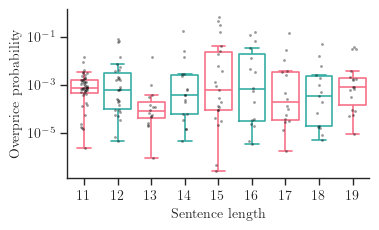

In [3]:

sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469
palette = sns.color_palette('husl', 2)
utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX
raw_df = pd.DataFrame({"lengths": np.load("outputs/sentences_lengths_short.npy"), "probs": np.load("outputs/probability_overcost_short.npy")})


fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# draw axis
sns.stripplot(x="lengths", y="probs", data=raw_df, ax=ax, color="black" ,size=2, jitter=True, alpha=0.4)

sns.boxplot(data=raw_df, x="lengths",y="probs", palette=palette, ax=ax  , fliersize=0, fill=False) 
#sns.violinplot(x="lengths", y="probs", data=raw_df, ax=ax, palette=palette, alpha=0.3)

         
sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Sentence length")
ax.set_ylabel("Overprice probability")
#ax.legend(title="p", loc='upper left')

fig.tight_layout()
plt.show()
fig.savefig('figures/mutilple_sentences_shorts.pdf', dpi=300)